
Observed Trends 

*There is a clear correlation between distance from the center of the Earth and maximum temperature. As latitude increase or decreases from around the 0-20 degree range of latitudes, the temperature decreases. This makes perfect sense logically. The further you are from the equator, the colder you would expect to be.
*North of the equator, in particular 20-40 degrees, appears to be the most humid part of the world. On average, it appears that being north of the equator lends itself to a more humid environment vs. south of the equator.
*No matter where you are, on any given day, it could be cloudy. The highest concentration of high cloudiness corresponds to 40-80 degrees north of the equator. In fact, if we only look at cloudiness above 50%, the highest concentration remains with the largely far northern latitude cities. With respect to cloudiness between 5% and 50%, there appears to be no correlation with the latitude.

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from citipy import citipy
import requests
import seaborn as sns
from datetime import datetime


In [2]:
#import API key 
from config import api_key

In [4]:
#i is for the amount of cities to pull 
i = 500
cities = []
country_codes = []

for x in range(i):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
#no dup's
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
#add the data 
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

In [5]:
# Create URL and indicate unit type 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
# Build partial query URL
query = f"{url}appid={api_key}&units={units}&q="

In [7]:
# Create buckets to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    

    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=sitka,US
Processing record 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=ushuaia,AR
Processing record 3 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=khatanga,RU
Processing record 4 | tual
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=tual,ID
Processing record 5 | chengde
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=chengde,CN
Processing record 6 | poum
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=poum,NC
Processing record 7 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=hermanus,ZA
Proc

Processing record 57 | korla
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=korla,CN
Processing record 58 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=new norfolk,AU
Processing record 59 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=saint george,BM
Processing record 60 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=jamestown,SH
Processing record 61 | kovdor
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=kovdor,RU
Processing record 62 | svetlyy
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=svetlyy,RU
Processing record 63 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffc

Processing record 113 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=bethel,US
Processing record 114 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=butaritari,KI
Processing record 115 | kempsey
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=kempsey,AU
Processing record 116 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=codrington,AG
Processing record 117 | yefira
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=yefira,GR
Processing record 118 | ojinaga
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=ojinaga,MX
Processing record 119 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e

Processing record 171 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=hithadhoo,MV
Processing record 172 | mount hagen
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=mount hagen,PG
Processing record 173 | sechura
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=sechura,PE
Processing record 174 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=geraldton,AU
Processing record 175 | ust-kan
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=ust-kan,RU
Processing record 176 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=kodiak,US
Processing record 177 | lubartow
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378df

Processing record 227 | bar
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=bar,UA
Processing record 228 | katherine
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=katherine,AU
Processing record 229 | urazovo
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=urazovo,RU
Processing record 230 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=sabang,ID
Processing record 231 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=port hardy,CA
Processing record 232 | churapcha
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=churapcha,RU
Processing record 233 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&unit

Processing record 284 | wainwright
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=wainwright,CA
Processing record 285 | rorvik
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=rorvik,NO
Processing record 286 | savannah bight
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=savannah bight,HN
Processing record 287 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=torbay,CA
Processing record 288 | kerteh
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=kerteh,MY
Processing record 289 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=mount isa,AU
Processing record 290 | pryozerne
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8

Processing record 340 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=grand gaube,MU
Processing record 341 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=coihaique,CL
Processing record 342 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=flinders,AU
Processing record 343 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=lompoc,US
Processing record 344 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=mandalgovi,MN
Processing record 345 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=mahebourg,MU
Processing record 346 | stoyba
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b

Processing record 396 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=bambous virieux,MU
Processing record 397 | antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=antofagasta,CL
Processing record 398 | tuggurt
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=tuggurt,DZ
Processing record 399 | wulanhaote
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=wulanhaote,CN
Processing record 400 | gat
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=gat,LY
Processing record 401 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=san carlos de bariloche,AR
Processing record 402 | gazanjyk
http://api.openweathermap.org/data/2.

Processing record 452 | la uribe
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=la uribe,CO
Processing record 453 | chinhoyi
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=chinhoyi,ZW
Processing record 454 | puerto madero
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=puerto madero,MX
Processing record 455 | poso
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=poso,ID
Processing record 456 | pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=pangkalanbuun,ID
Processing record 457 | birjand
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019553a89b8378dffcc0e7a1&units=imperial&q=birjand,IR
Processing record 458 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=001c7655019

In [8]:
# Remove any cities that have NaN values
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 446 unique cities.


In [9]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
0,sitka,57.05,-135.33,82.0,59.00,75,6.24,1.596481e+09,US
1,ushuaia,-54.80,-68.30,43.0,50.00,40,11.41,1.596481e+09,AR
2,khatanga,71.97,102.50,80.0,60.89,0,6.69,1.596481e+09,RU
3,tual,-5.67,132.75,84.0,77.70,100,14.76,1.596481e+09,ID
4,chengde,40.97,117.94,58.0,69.37,0,2.75,1.596481e+09,CN


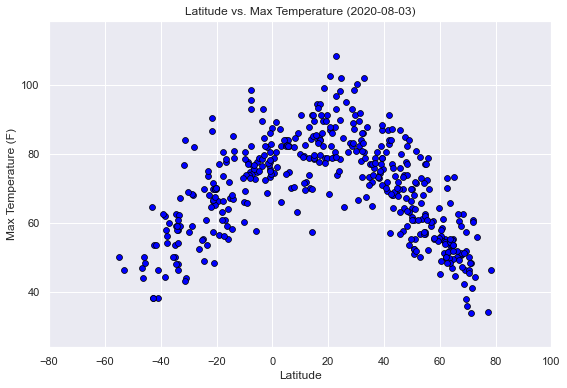

In [10]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)


plt.show()

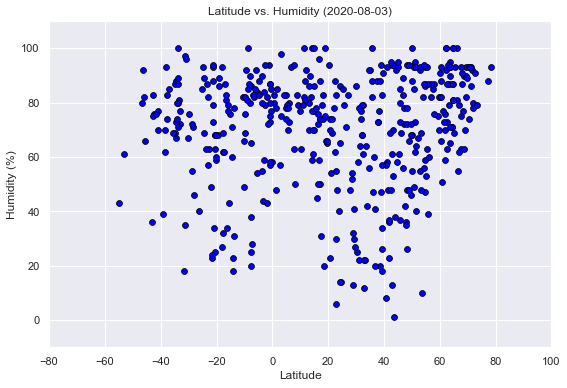

In [11]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

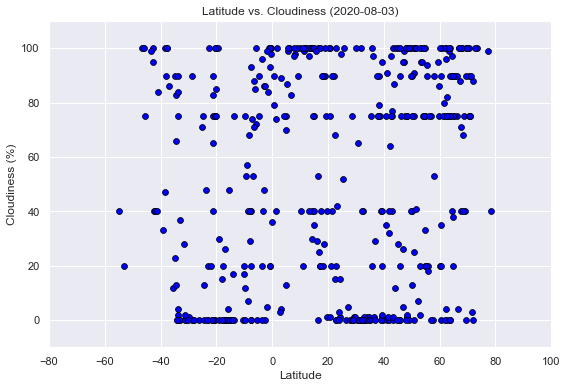

In [12]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

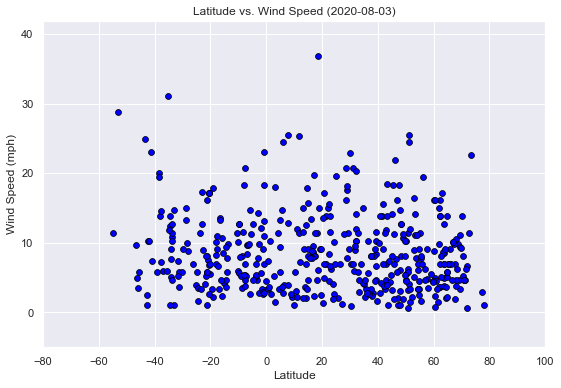

In [13]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)


plt.show()